# 3.4 Ein Einfaches Neuronales Netz

In [1]:
import os.path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

In [2]:
# Lade den Iris-Datenset
data_train = pd.read_csv('./input/iris.csv')

In [3]:
# Die 3 zu erkennenden Klassifikationsklassen werden zu numerischen Werten 0, 1 bzw. 2 umgewandelt.
data_train.loc[data_train['species']=='Iris-setosa', 'species']=0
data_train.loc[data_train['species']=='Iris-versicolor', 'species']=1
data_train.loc[data_train['species']=='Iris-virginica', 'species']=2
data_train = data_train.apply(pd.to_numeric)

In [4]:
# Der eingelesene Datenset wird als Matrix dargestellt
data_train_array = data_train.values # oder data_train.to_numpy()

In [5]:
# Zur Sicherstellung der Reproduzierbarkeit der Ergebnisse setzen wir random.seed auf eine festen Wert, z.B. 42
np.random.seed(17)

Das Datenset wird in zwei separate Kategorie gespaltet: Testdaten und Trainingsdaten. 

80% der Daten werden zum Trainieren und 20% zum Testen des Modells verwendet. 

Da es sich bei der Eingabe um einen Vektor handelt, werden wird den Großbuchstaben X benutzen.

Für die Ausgabe hingegen handelt es sich um ein einzelner Werte, 
daher die Bezeichung mit dem Kleinbuchstaben y.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_train_array[:,:4],
                                                    data_train_array[:,4],
                                                    test_size=0.2)

### Version 1
Ein neuronales Netz zur Klassifikation (MultiLayerPerceptron) wird mit folgenden Eigenschaften gebildet:
- einem Input-Layer mit 4 Neuronen, die die Merkmale der Iris-Planze repräsentieren
- einem Hidden-Layer mit 10 Neuronen
- einem Output-Layer mit 3 Neuronen, die die zu erkennenden Klassen repräsentieren

Dabei wird als Aktivierungsfunktion relu und als Optimierer adam verwenden.

<img src="img/network_01.png" height="400"/>

In [7]:
#mlp = MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)

### VERSION 2
Erstelle eine zweite Version des neuronalen Netzes mit folgenden Eigenschaften:
- einem Input-Layer mit 4 Neuronen, die die Merkmale der Iris-Planze repräsentieren
- zwei Hidden-Layer mit jeweils 3 und 5 Neuronen
- einem Output-Layer mit 3 Neuronen, die die zu erkennenden Klassen repräsentieren

Füge die Zweite Version direkt unter der Ersten ein. Und führe die neu Zelle und alle folgenden aus.

<img src="img/network_02.png" height="400"/>

In [8]:
# Zweite Version:
mlp = MLPClassifier(hidden_layer_sizes=(5,3),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)

In [9]:
# Das neuronale Netz wird mit den Trainingsdaten traniert
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.95771780
Iteration 2, loss = 2.70584492
Iteration 3, loss = 2.48650939
Iteration 4, loss = 2.31369613
Iteration 5, loss = 2.18106097
Iteration 6, loss = 2.05814781
Iteration 7, loss = 1.93317432
Iteration 8, loss = 1.82325417
Iteration 9, loss = 1.71835883
Iteration 10, loss = 1.62721635
Iteration 11, loss = 1.53848282
Iteration 12, loss = 1.46125707
Iteration 13, loss = 1.38649298
Iteration 14, loss = 1.32253906
Iteration 15, loss = 1.25912442
Iteration 16, loss = 1.20788310
Iteration 17, loss = 1.15504144
Iteration 18, loss = 1.11168752
Iteration 19, loss = 1.06842053
Iteration 20, loss = 1.02917010
Iteration 21, loss = 0.99582903
Iteration 22, loss = 0.96694460
Iteration 23, loss = 0.94906935
Iteration 24, loss = 0.92492069
Iteration 25, loss = 0.90748936
Iteration 26, loss = 0.89455243
Iteration 27, loss = 0.88055446
Iteration 28, loss = 0.86742288
Iteration 29, loss = 0.85570512
Iteration 30, loss = 0.84437839
Iteration 31, loss = 0.83214619
Iteration 32, los

Iteration 55, loss = 0.58821759
Iteration 56, loss = 0.57872913
Iteration 57, loss = 0.57002074
Iteration 58, loss = 0.56051583
Iteration 59, loss = 0.55162714
Iteration 60, loss = 0.54308930
Iteration 61, loss = 0.53629857
Iteration 62, loss = 0.52528776
Iteration 63, loss = 0.51601163
Iteration 64, loss = 0.50786386
Iteration 65, loss = 0.49975782
Iteration 66, loss = 0.49126349
Iteration 67, loss = 0.48256083
Iteration 68, loss = 0.47444986
Iteration 69, loss = 0.46769598
Iteration 70, loss = 0.45873114
Iteration 71, loss = 0.45137035
Iteration 72, loss = 0.44418790
Iteration 73, loss = 0.43645836
Iteration 74, loss = 0.42976474
Iteration 75, loss = 0.42275282
Iteration 76, loss = 0.41565795
Iteration 77, loss = 0.40914752
Iteration 78, loss = 0.40275652
Iteration 79, loss = 0.39636033
Iteration 80, loss = 0.38959853
Iteration 81, loss = 0.38358397
Iteration 82, loss = 0.37786335
Iteration 83, loss = 0.37241175
Iteration 84, loss = 0.36609235
Iteration 85, loss = 0.36103804
Iteratio

MLPClassifier(batch_size=10, hidden_layer_sizes=(5, 3), max_iter=350,
              verbose=True)

In [10]:
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp.score(X_train, y_train))

Trainingsergebnis: 0.975


In [11]:
# Das Modell wird mit den Testdatensdaten evaluiert
predictions = mlp.predict(X_test)
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions))  

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


In [12]:
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [13]:
# Das Modell wird getest und das Ergebnis ausgegeben
print("Testergebnis: %5.3f" % mlp.score(X_test,y_test))

Testergebnis: 0.967


In [14]:
# Folgendes gibt die Werte der Gewichte pro Layer aus
print("WEIGHTS:", mlp.coefs_)
print("BIASES:", mlp.intercepts_) 

WEIGHTS: [array([[ 1.91491544e-01,  5.62592429e-01, -2.36299528e-16,
        -1.00435352e-01,  2.71226726e-01],
       [-2.47177841e-01,  2.44837672e-01,  5.70733664e-77,
         6.31257398e-01,  6.70787725e-01],
       [ 8.92743254e-01, -6.14905780e-01, -1.77043436e-10,
        -2.02422889e-01, -5.46401806e-01],
       [ 1.00542542e-01, -7.83295160e-01,  1.04750875e-16,
         1.34472025e+00, -6.99695876e-01]]), array([[-3.24592925e-09,  1.21116175e+00,  3.47791406e-01],
       [ 1.03266066e-82, -3.43326910e-01,  5.88720663e-01],
       [ 3.53990178e-42, -2.47474292e-70,  9.61105385e-10],
       [-1.35412489e-62, -1.22192363e-02, -1.07763998e+00],
       [-2.16892387e-81, -9.74042850e-01,  2.94618243e+00]]), array([[ 1.11076804e-18, -1.45122848e-13, -4.46453373e-50],
       [-2.22298032e+00, -1.88245774e-01,  5.59829240e-01],
       [ 1.00115368e+00,  6.50006289e-01, -1.12590400e+00]])]
BIASES: [array([ 0.82950644,  0.75596277, -0.66797373, -0.89643598,  0.9292694 ]), array([-0.315

In [15]:
# Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten 
# aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width, 
# petal-length, petal-width]
print(mlp.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))

[0. 2. 0. 1.]


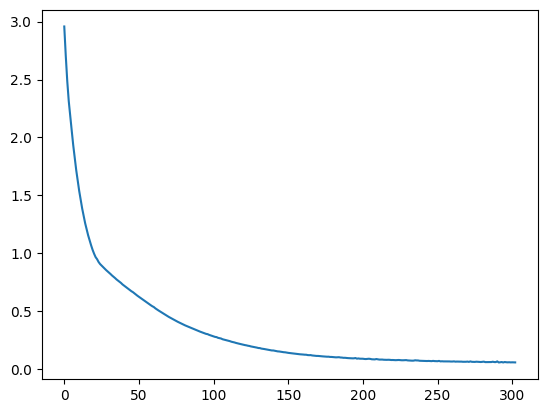

In [16]:
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp.loss_curve_
plt.plot(loss_values)
# Check, if there is already a file with the same name
# If yes, add a number to the filename
i = 0
while os.path.isfile("./output/plot_of_loss_values.png"):
    i += 1
    plt.savefig("./output/plot_of_loss_values" + str(i) + ".png")
plt.show()